# How to code a Neural Network

## Initial data

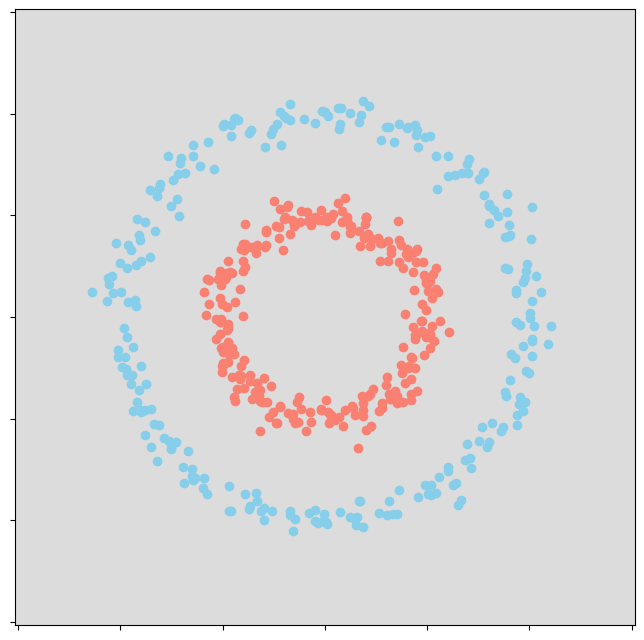

In [1]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

from sklearn.datasets import make_circles

# We create our artificial data, where we will seek to classify
# two concentric rings of data.
X, Y = make_circles(n_samples=500, factor=0.5, noise=0.05)

# Resolution
res = 100

# Coordinates
_x0 = np.linspace(-1.5, 1.5, res)
_x1 = np.linspace(-1.5, 1.5, res)

# Input with each combo of coordinates of the prediction map.
_pX = np.array(np.meshgrid(_x0, _x1)).T.reshape(-1, 2)

# Empty object at 0.5
_pY = np.zeros((res, res)) + 0.5

# Visualization of the prediction map.
plt.figure(figsize=(8, 8))
plt.pcolormesh(_x0, _x1, _pY, cmap="coolwarm", vmin=0, vmax=1)

# Visualization of the data cloud.
plt.scatter(X[Y == 0,0], X[Y == 0,1], c="skyblue")
plt.scatter(X[Y == 1,0], X[Y == 1,1], c="salmon")

plt.tick_params(labelbottom=False, labelleft=False)

In [2]:
# Checking the dataframe shape
X.shape

(500, 2)

In [3]:
# Visualization label vector
Y

array([0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0,

# Neural networks using Keras

In [4]:
import keras as kr

lr = 0.05           # learning rate
nn = [2, 16, 8, 1]  # number of neurons per layer.

# We create the object that will contain our neural network, as a
# sequence of layers.
model = kr.Sequential()

# Add layer 1
l1 = model.add(kr.layers.Dense(nn[1], activation='relu'))

# Add layer 2
l2 = model.add(kr.layers.Dense(nn[2], activation='relu'))

# Add layer 3
l3 = model.add(kr.layers.Dense(nn[3], activation='sigmoid'))

# We compile the model, defining the cost function and the optimizer.
model.compile(loss='binary_crossentropy', optimizer=kr.optimizers.SGD(learning_rate=lr), metrics=['acc'])

# And we train the model
model.fit(X, Y, epochs=100)

Epoch 1/100
16/16 [==============================] - 4s 9ms/step - loss: 0.6898 - acc: 0.5340
Epoch 2/100
16/16 [==============================] - 0s 11ms/step - loss: 0.6842 - acc: 0.5840
Epoch 3/100
16/16 [==============================] - 0s 7ms/step - loss: 0.6770 - acc: 0.6720
Epoch 4/100
16/16 [==============================] - 0s 6ms/step - loss: 0.6702 - acc: 0.6620
Epoch 5/100
16/16 [==============================] - 0s 4ms/step - loss: 0.6631 - acc: 0.8040
Epoch 6/100
16/16 [==============================] - 0s 6ms/step - loss: 0.6542 - acc: 0.8460
Epoch 7/100
16/16 [==============================] - 0s 5ms/step - loss: 0.6427 - acc: 0.9300
Epoch 8/100
16/16 [==============================] - 0s 5ms/step - loss: 0.6321 - acc: 0.9140
Epoch 9/100
16/16 [==============================] - 0s 6ms/step - loss: 0.6198 - acc: 0.9740
Epoch 10/100
16/16 [==============================] - 0s 6ms/step - loss: 0.6064 - acc: 0.9880
Epoch 11/100
16/16 [==============================] - 0s 6

# Neural networks using Sklearn

In [5]:
import sklearn as sk
import sklearn.neural_network


lr = 0.05           # learning rate
nn = [2, 16, 8, 1]  # number of neurons per layer.

# We create the multilayer neural network model object.
clf = sk.neural_network.MLPRegressor(solver='sgd',
                                     learning_rate_init=lr,
                                     hidden_layer_sizes=tuple(nn),
                                     verbose=True,
                                     n_iter_no_change=1000,
                                     batch_size = 64)


# And we train the model
clf.fit(X, Y)

Iteration 1, loss = 0.16641220
Iteration 2, loss = 0.13701250
Iteration 3, loss = 0.12716693
Iteration 4, loss = 0.12596557
Iteration 5, loss = 0.12578017
Iteration 6, loss = 0.12522907
Iteration 7, loss = 0.12506581
Iteration 8, loss = 0.12534509
Iteration 9, loss = 0.12515933
Iteration 10, loss = 0.12547138
Iteration 11, loss = 0.12553931
Iteration 12, loss = 0.12500415
Iteration 13, loss = 0.12540516
Iteration 14, loss = 0.12539375
Iteration 15, loss = 0.12508656
Iteration 16, loss = 0.12545755
Iteration 17, loss = 0.12573212
Iteration 18, loss = 0.12543776
Iteration 19, loss = 0.12506135
Iteration 20, loss = 0.12537499
Iteration 21, loss = 0.12556207
Iteration 22, loss = 0.12536064
Iteration 23, loss = 0.12518399
Iteration 24, loss = 0.12593680
Iteration 25, loss = 0.12518264
Iteration 26, loss = 0.12523582
Iteration 27, loss = 0.12547257
Iteration 28, loss = 0.12528727
Iteration 29, loss = 0.12521159
Iteration 30, loss = 0.12527969
Iteration 31, loss = 0.12538029
Iteration 32, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(batch_size=64, hidden_layer_sizes=(2, 16, 8, 1),
             learning_rate_init=0.05, n_iter_no_change=1000, solver='sgd',
             verbose=True)